#### Import of Libraries

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [219]:
df = pd.read_csv('datasets/fertility/fertility.csv')
#df_cd = pd.merge(df["at1"],df["height"], how='inner',left_on=None)
#df.to_csv('page_blocks_edited.csv', index=False)
#df=df.drop(columns=["id"])

In [220]:
df.head(5)

,Season,Age,ChildhoodDiseases,Accident,SurgicalIntervention,HighFevers,FrequencyAlcoholConsumption,SmokingHabit,sittingPerDay,Class
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [221]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Season                       100 non-null    float64
 1   Age                          100 non-null    float64
 2   ChildhoodDiseases            100 non-null    int64  
 3   Accident                     100 non-null    int64  
 4   SurgicalIntervention         100 non-null    int64  
 5   HighFevers                   100 non-null    int64  
 6   FrequencyAlcoholConsumption  100 non-null    float64
 7   SmokingHabit                 100 non-null    int64  
 8   sittingPerDay                100 non-null    float64
 9   Class                        100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

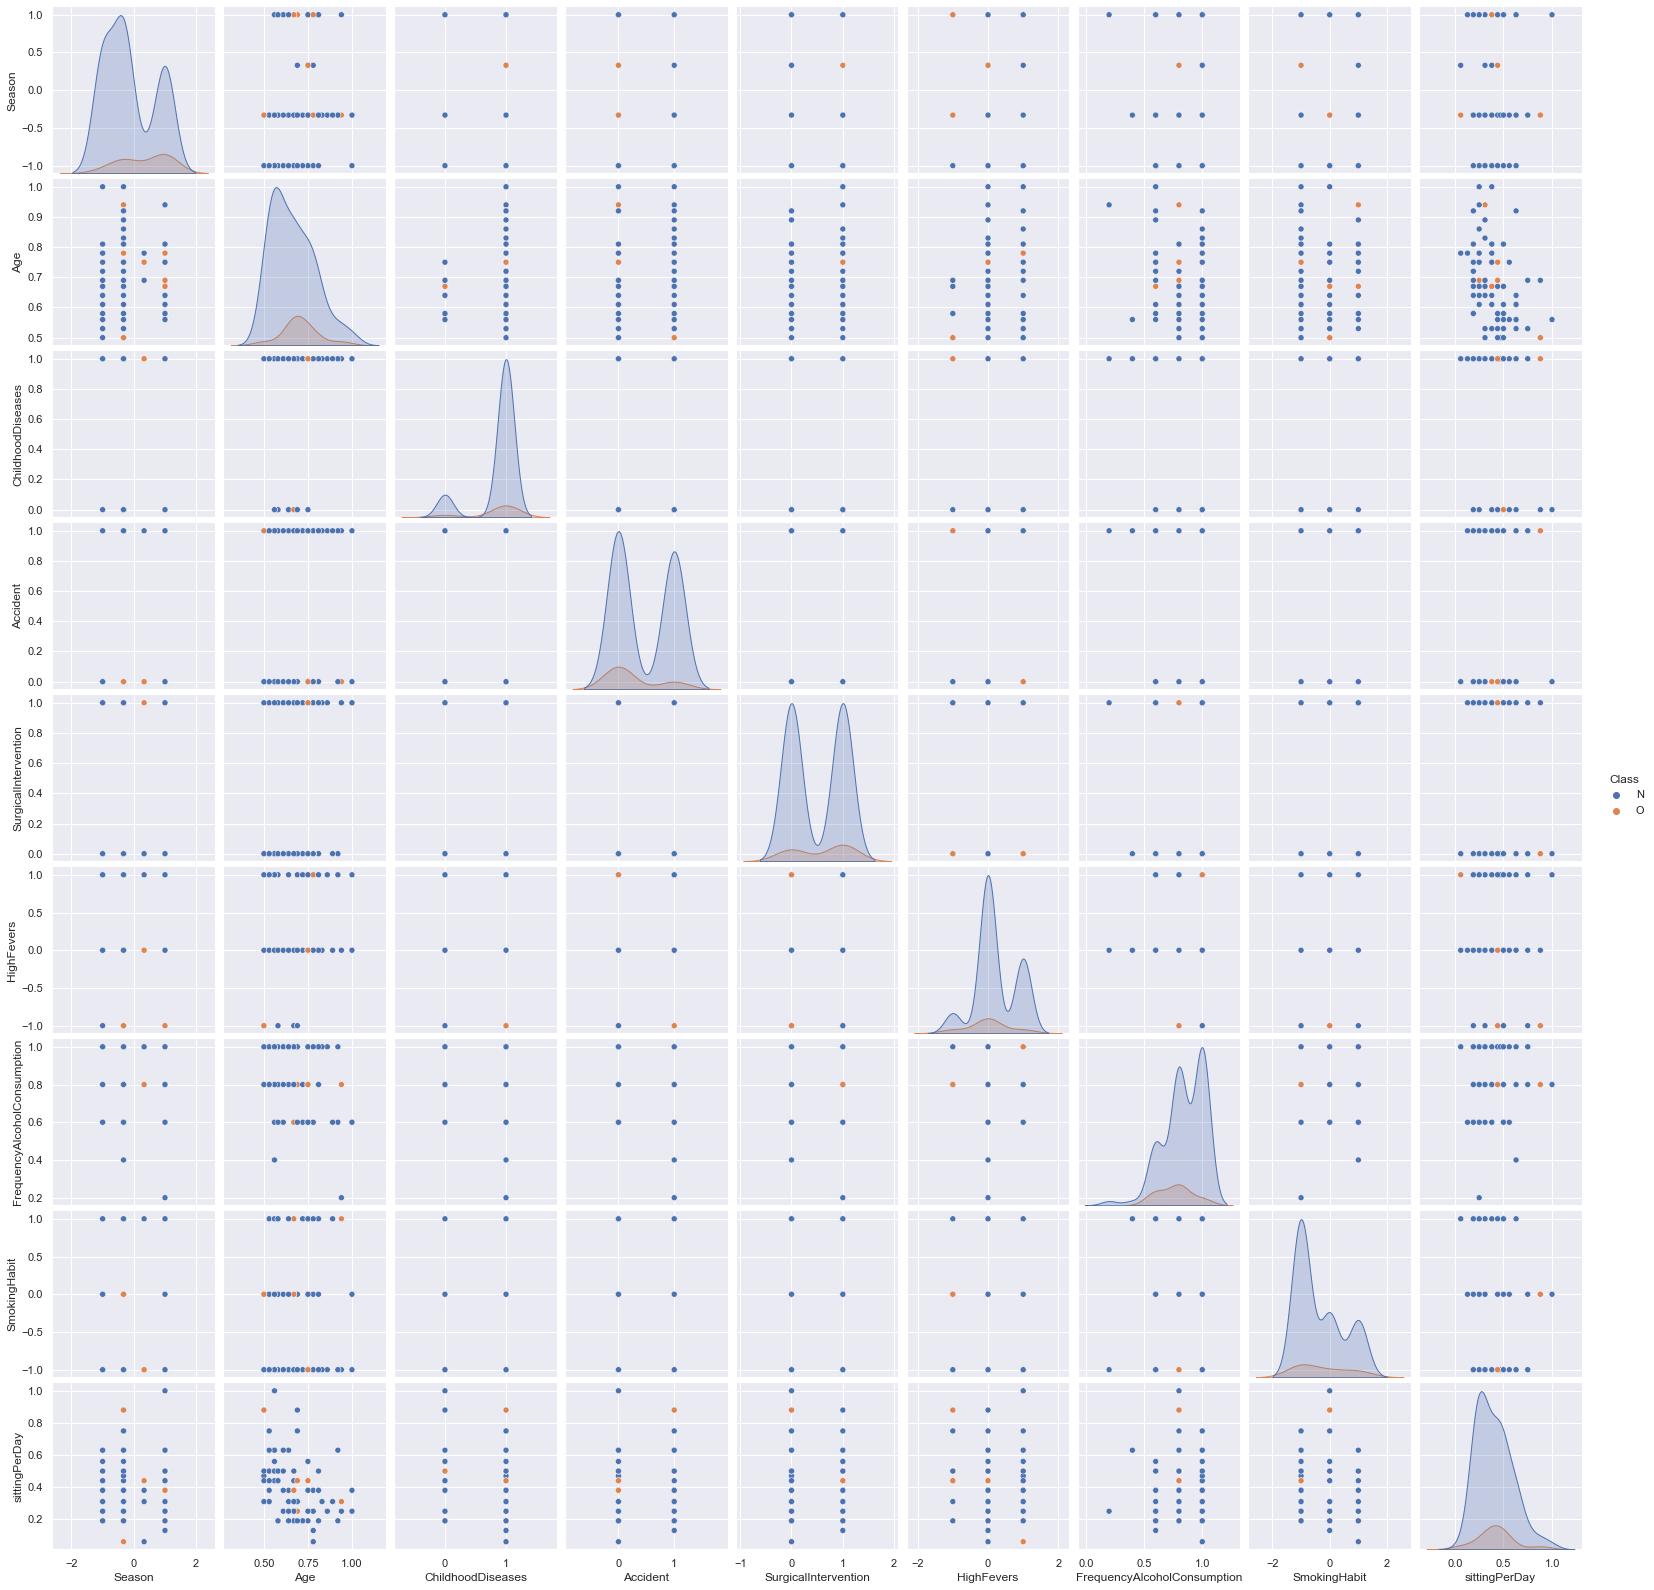

In [222]:
sns.pairplot(df, hue='Class')
plt.show()

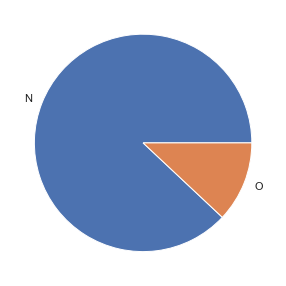

In [223]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [224]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Season,100.0,-0.0789,0.796725,-1.00,-1.00,-0.33,1.00,1.0
Age,100.0,0.6690,0.121319,0.50,0.56,0.67,0.75,1.0
ChildhoodDiseases,100.0,0.8700,0.337998,0.00,1.00,1.00,1.00,1.0
Accident,100.0,0.4400,0.498888,0.00,0.00,0.00,1.00,1.0
SurgicalIntervention,100.0,0.5100,0.502418,0.00,0.00,1.00,1.00,1.0
HighFevers,100.0,0.1900,0.580752,-1.00,0.00,0.00,1.00,1.0
FrequencyAlcoholConsumption,100.0,0.8320,0.167501,0.20,0.80,0.80,1.00,1.0
SmokingHabit,100.0,-0.3500,0.808728,-1.00,-1.00,-1.00,0.00,1.0
sittingPerDay,100.0,0.4068,0.186395,0.06,0.25,0.38,0.50,1.0


#### Standardize the Data

In [225]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Season,100.0,3.552714e-17,1.005038,-1.161931,-1.161931,-0.316753,1.360990,1.360990
Age,100.0,-1.956768e-16,1.005038,-1.400045,-0.902988,0.008284,0.671028,2.742100
ChildhoodDiseases,100.0,-5.773160e-17,1.005038,-2.586949,0.386556,0.386556,0.386556,0.386556
Accident,100.0,7.105427e-17,1.005038,-0.886405,-0.886405,-0.886405,1.128152,1.128152
SurgicalIntervention,100.0,-5.551115e-17,1.005038,-1.020204,-1.020204,0.980196,0.980196,0.980196
HighFevers,100.0,4.773959e-17,1.005038,-2.059391,-0.328810,-0.328810,1.401770,1.401770
FrequencyAlcoholConsumption,100.0,9.525714e-16,1.005038,-3.792121,-0.192006,-0.192006,1.008032,1.008032
SmokingHabit,100.0,-5.551115e-18,1.005038,-0.807781,-0.807781,-0.807781,0.434959,1.677698
sittingPerDay,100.0,3.197442e-16,1.005038,-1.869936,-0.845461,-0.144505,0.502532,3.198517


#### Observations and Variables

In [226]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

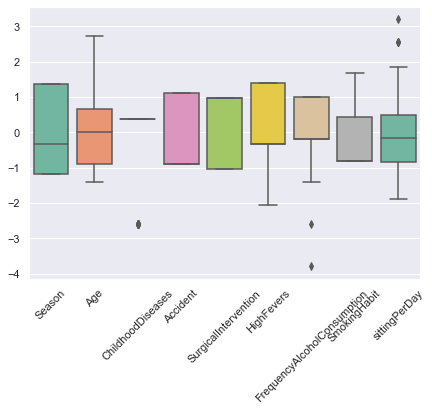

In [227]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

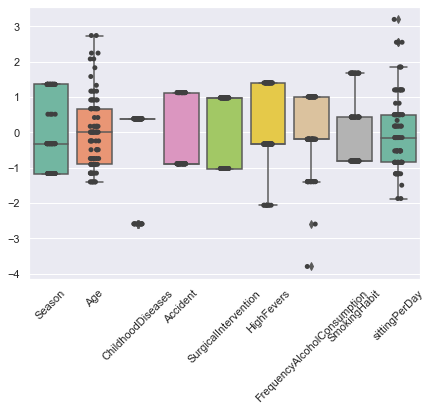

In [228]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

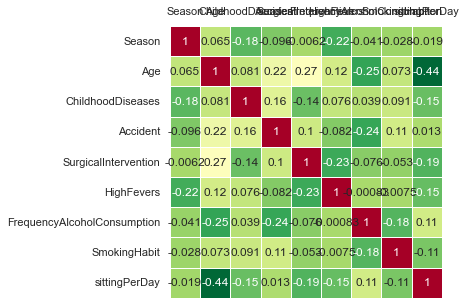

In [229]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [230]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [231]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.708366,1.851833,1.576799,-0.344168,2.381435,-0.594202,1.584513,-0.716592,0.562432
1,2.048427,0.176078,-0.524897,0.372537,-0.632203,-1.457112,0.092967,-1.128691,1.349723
2,-2.179288,-0.627278,-0.181584,-0.338910,-0.583787,0.132162,-0.508802,0.389664,0.078161
3,0.104001,1.723623,-0.621275,-1.131864,1.452825,-0.191195,1.776360,1.091645,0.361763
4,-0.220799,-0.465998,0.974122,-0.504492,0.143650,1.274858,0.004690,0.549574,0.442848
...,...,...,...,...,...,...,...,...,...
95,-1.345671,-0.949073,-0.438427,-0.769477,-0.249488,0.033268,-0.332999,0.188619,1.284408
96,-0.878091,-1.031083,0.522784,0.226634,-0.000709,-0.699020,-0.876827,0.088747,0.852922
97,0.424280,-0.165006,-0.075934,-2.214592,-0.158089,-0.109690,0.434607,0.615123,-0.246092
98,0.194282,-0.364341,-0.970707,-1.003220,-0.775232,-1.745632,-0.313952,0.331045,-0.089949


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'9 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (20.7% expl.var)', ylabel='PC2 (16.1% expl.var)'>)

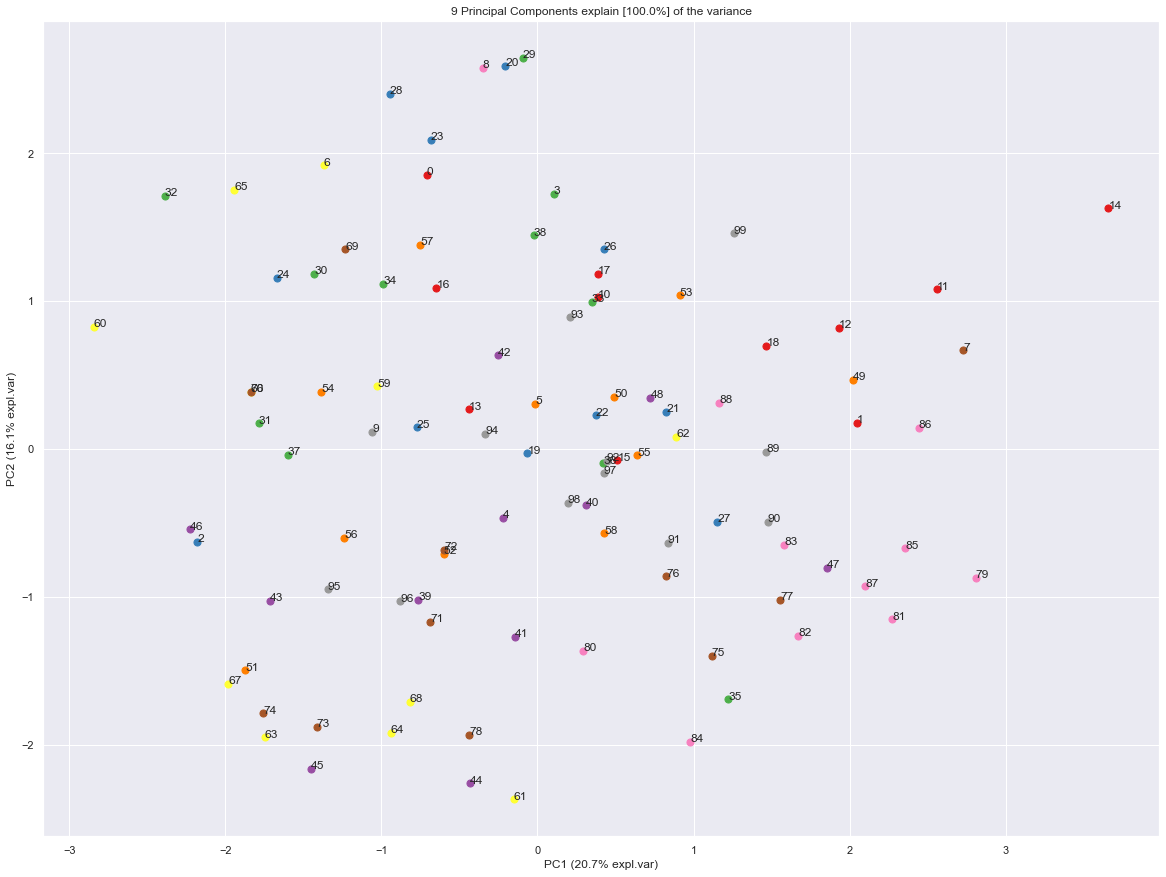

In [232]:
model.scatter(label=True, legend=False)

Eigenvectors

In [233]:
A = out['loadings'].T

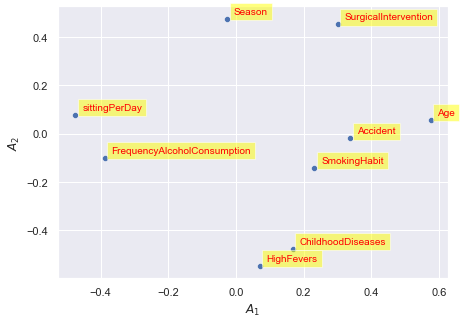

In [234]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

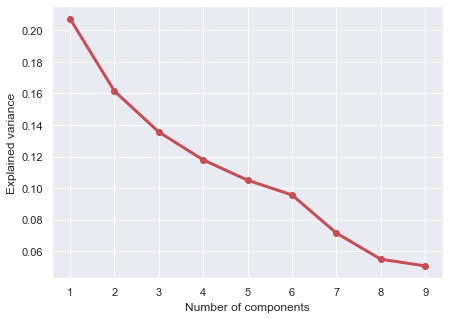

In [235]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

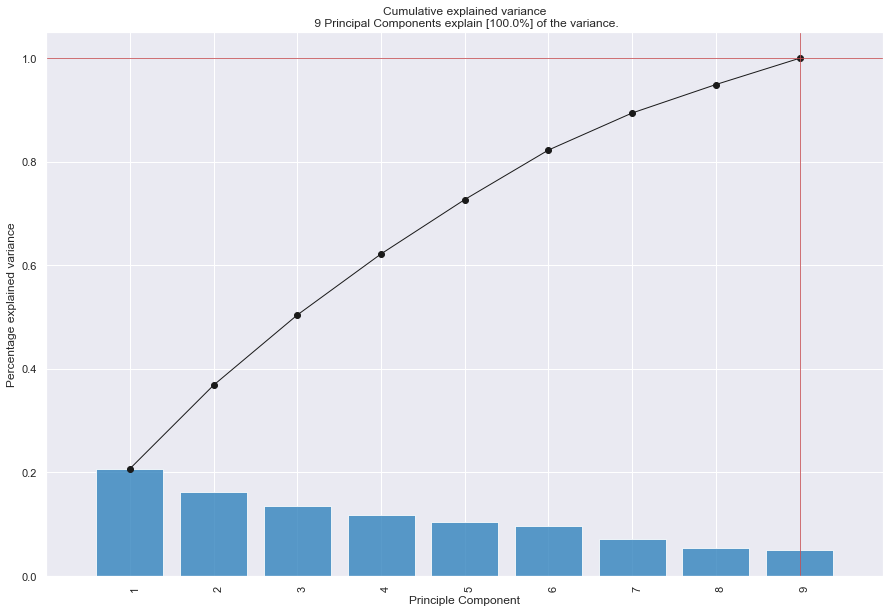

<Figure size 504x360 with 0 Axes>

In [236]:
model.plot();